# 金融データの可視化

## データの準備

今回は次のようなコインの変動ログを用意しました。データはご自身でご用意下さい。

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_finance import candlestick2_ohlc

from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = (8, 4)

In [3]:
df = pd.read_csv('./data/bitcoin.csv')
df.index = pd.to_datetime(df['Timestamp'], unit='s')
df.index = df.index.tz_localize('UTC').tz_convert('Asia/Tokyo')
df = df['2016-01-01 01:30:00':'2016-01-01 02:00:00']
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2016-01-01 01:30:00+09:00,1451579400,424.90,424.90,424.81,424.81,1.359146,577.401659,424.826932
2016-01-01 01:31:00+09:00,1451579460,424.90,425.16,424.90,425.16,15.071566,6407.805829,425.158586
2016-01-01 01:32:00+09:00,1451579520,424.90,425.16,424.90,425.16,15.071566,6407.805829,425.158586
2016-01-01 01:33:00+09:00,1451579580,425.17,426.44,425.17,426.44,4.308862,1833.566769,425.533844
2016-01-01 01:34:00+09:00,1451579640,426.44,426.47,426.14,426.16,7.632952,3253.258021,426.212304


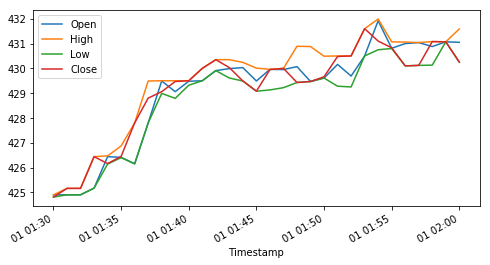

In [4]:
df.loc[:, ['Open', 'High', 'Low', 'Close']].plot()

## ローソク足

FX等でよく使われる次の4本値の値動きを時系列にそって表示する。

* 始値 (Open)
* 高値 (High)
* 安値 (Low)
* 終値 (Close)

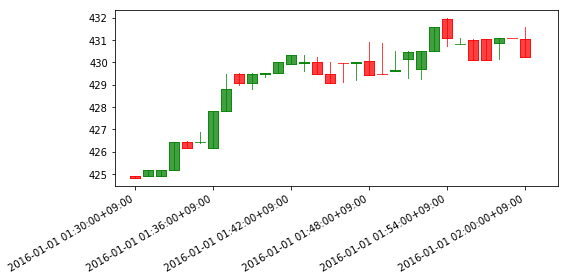

In [5]:
fig, ax = plt.subplots()
candlestick2_ohlc(ax, opens=df['Open'], closes=df['Close'], lows=df['Low'], highs=df['High'],
                 width=0.8, colorup='green', colordown='red')

ax.xaxis.set_major_locator(ticker.MaxNLocator(6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: df.index[int(x)] if len(df.index) > int(x) else ''))
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

* 始値より上昇して終値が高いものを「陽線」 (緑)
* 始値より下落して終値が安いものを「陰線」 (赤)